In [1]:
import numpy as np
import sys, os
sys.path.append('../../shared/utilsGRF/')
from IPython.display import display
import writescripts 

In [2]:
edges=[(1,'a1',2),(2,'a2',3),(3,'a3',4),(4,'a4',1),
       (5,'alpha1',6),(6,'alpha2',7),(7,'alpha3',8),(8,'alpha4',5),
      (1,'kb1-x',5),(5,'ku1',1),(2,'kb2-x',6),(6,'ku2',2),(3,'kb3-x',7),(7,'ku3',3),(4,'kb4-x',8),(8,'ku4',4)]

MTTfolder='../../shared/utilsGRF' #folder with MTT.py 
basename='graph'

parlist=[x[1] for x in edges]
parlist=list(set(parlist))


list(set(parlist))

for pnum,par in enumerate(parlist):
    if '-x' in par:
        parlist[pnum]=parlist[pnum].replace('-x','')
print(parlist)

obj=writescripts.PrepareFilesNoneq(edgelist=edges,varGRF='x',concvars=['x'],parlist=parlist,MTTfolder=MTTfolder,graphbasename=basename)
obj.write_execute_parse()

obj.simpify_rhos()

['a3', 'kb1', 'a1', 'kb2', 'kb3', 'ku4', 'alpha3', 'ku2', 'a2', 'ku1', 'alpha4', 'alpha1', 'alpha2', 'a4', 'ku3', 'kb4']
removing  ../../shared/utilsGRF/graph-parsed.txt
removing  ../../shared/utilsGRF/graph-6.txt
removing  ../../shared/utilsGRF/graph-7.txt
removing  ../../shared/utilsGRF/graph-5.txt
removing  ../../shared/utilsGRF/graph-4.txt
removing  ../../shared/utilsGRF/graph-1.txt
removing  ../../shared/utilsGRF/graph-3.txt
removing  ../../shared/utilsGRF/graph-2.txt
removing  ../../shared/utilsGRF/graph-8.txt
removing  ../../shared/utilsGRF/graph.txt
executing MTT
0


In [3]:
import sympy
from sympy.parsing.sympy_parser import parse_expr

In [4]:
sympy.init_printing()

In [5]:
for label in parlist:
    #print(label)
    exec("%s=sympy.symbols('%s')"%(label,label))
for var in ['x']:
    exec("%s=sympy.symbols('%s')"%(var,var))
epsilon1,epsilon2,epsilon3,epsilon4=sympy.symbols('epsilon_1,epsilon_2,epsilon_3,epsilon_4',positive=True)
kb,ku=sympy.symbols('k_b,k_u')
all_rhos_sympy=[]
for rho in obj.all_rhos:
    expr=parse_expr(rho.split("=")[1])
    expr_simple=expr.subs({alpha1:epsilon1*a1,alpha2:epsilon2*a2,alpha3:epsilon3*a3,alpha4:epsilon4*a4,kb1:kb,kb2:kb,kb3:kb,kb4:kb,ku1:ku,ku2:ku,ku3:ku,ku4:ku})
    all_rhos_sympy.append(expr_simple)

In [6]:
for i in range(6):
    print("Trees for node ",i+1)
    for tree in sympy.Add.make_args(all_rhos_sympy[i]):
        print(tree)
    print()

Trees for node  1
a2*a3*a4*k_u**4
a2*a3*a4**2*epsilon_4*k_u**3
a2*a3**2*a4*epsilon_3*k_u**3
a2**2*a3*a4*epsilon_2*k_u**3
a1*a2*a3*a4*epsilon_1*k_u**3
a2*a3**2*a4**2*epsilon_3*epsilon_4*k_u**2
a2**2*a3*a4**2*epsilon_2*epsilon_4*k_u**2
a2**2*a3**2*a4*epsilon_2*epsilon_3*k_u**2
a1*a2*a3*a4**2*epsilon_1*epsilon_4*k_u**2
a1*a2*a3**2*a4*epsilon_1*epsilon_3*k_u**2
a1*a2**2*a3*a4*epsilon_1*epsilon_2*k_u**2
a2*a3*a4*epsilon_2*k_b*k_u**3*x
a2*a3*a4*epsilon_3*k_b*k_u**3*x
a2*a3*a4*epsilon_4*k_b*k_u**3*x
a2**2*a3**2*a4**2*epsilon_2*epsilon_3*epsilon_4*k_u
a1*a2*a3**2*a4**2*epsilon_1*epsilon_3*epsilon_4*k_u
a1*a2**2*a3*a4**2*epsilon_1*epsilon_2*epsilon_4*k_u
a1*a2**2*a3**2*a4*epsilon_1*epsilon_2*epsilon_3*k_u
a2*a3*a4*epsilon_2*epsilon_3*k_b**2*k_u**2*x**2
a2*a3*a4*epsilon_2*epsilon_4*k_b**2*k_u**2*x**2
a2*a3*a4*epsilon_3*epsilon_4*k_b**2*k_u**2*x**2
a2*a3*a4**2*epsilon_2*epsilon_4*k_b*k_u**2*x
a2*a3*a4**2*epsilon_3*epsilon_4*k_b*k_u**2*x
a2*a3**2*a4*epsilon_2*epsilon_3*k_b*k_u**2*x
a2*a3**2*a4*eps

In [7]:
phi1=all_rhos_sympy[0]
phi2=all_rhos_sympy[1]
phi3=all_rhos_sympy[2]
phi4=all_rhos_sympy[3]
phi5=all_rhos_sympy[4]
phi6=all_rhos_sympy[5]
phi7=all_rhos_sympy[6]
phi8=all_rhos_sympy[7]

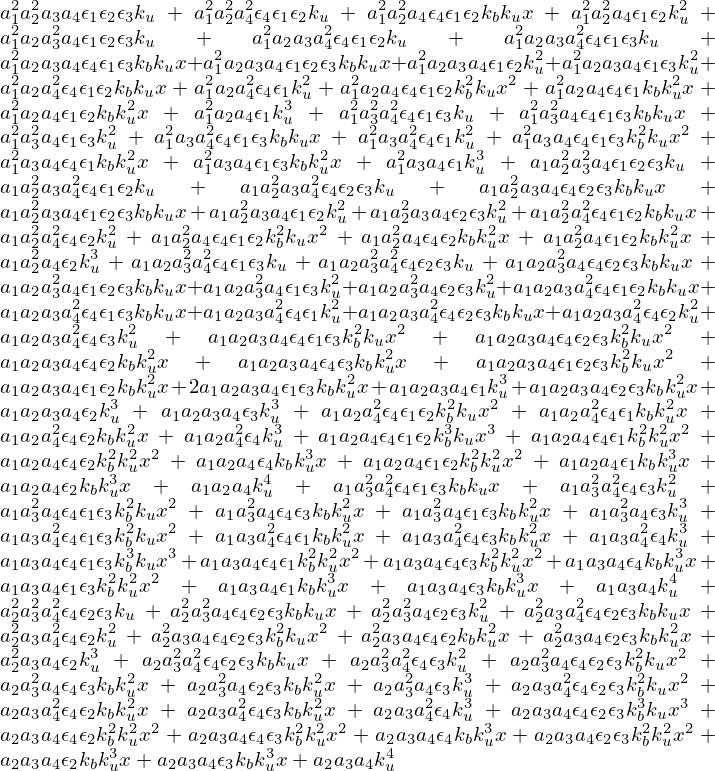

In [8]:
phi1+phi2+phi3

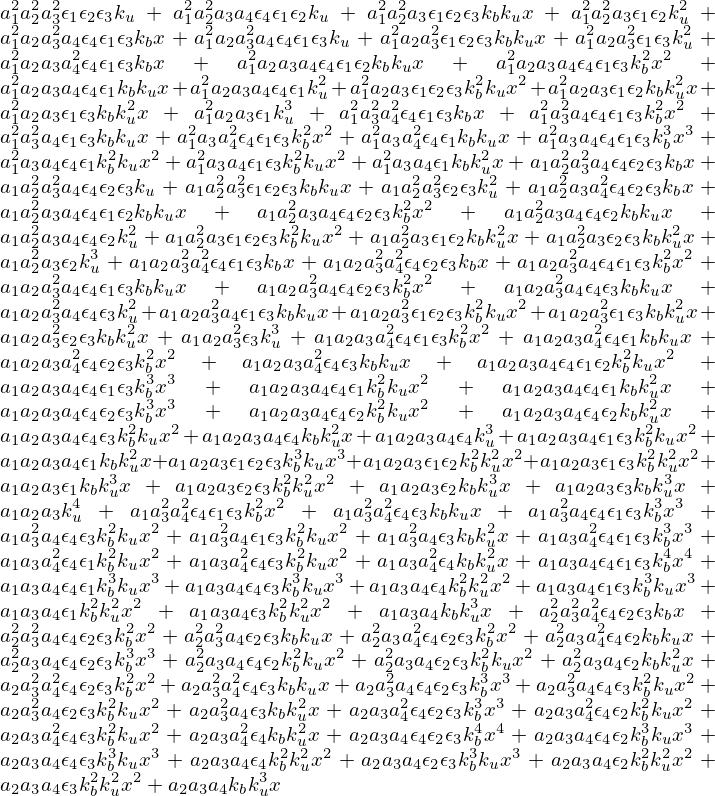

In [9]:
phi4+phi5+phi6

In [8]:
num=a4*phi4+a4*epsilon4*phi8
den=phi1+phi2+phi3+phi4+phi5+phi6+phi7+phi8

In [9]:
dnum=sympy.diff(num,x)
dden=sympy.diff(den,x)

In [10]:
#left=(sympy.diff(phi3,ku)+alpha3*sympy.diff(phi6,ku))*den
#right=(phi3+alpha3*phi6)*dden
left=dnum*den
right=num*dden

In [11]:
#B=sympy.symbols('B')

In [12]:
l_r=sympy.expand(left-right)
#l_rB=l_r.subs(kb*x,B)
poly_zero=sympy.Poly(l_r,x)


In [25]:
poly_zero.degree()

In [26]:
from sympy.printing import mathematica

In [17]:
if False: #not executed in March
    math_output=open("tocheckwithm_nonmx_4steps_irev.in","w")
    all_terms=[]
    for cn,coeff in enumerate(poly_zero.coeffs()[::-1]):
        termsc=[]
        print(cn)
        for monomial in sympy.Add.make_args(coeff):
            #print(monomial, sympy.Mul.make_args(monomial))
            noneps=[]
            eps=[]
            number=1
            eps_base=[] #bases, for ordering by letter
            noneps_base=[] #bases, for ordering by letter
            args= sympy.Mul.make_args(monomial) #separate each monomial into each variable (a,epsilon,number)
            for arg_ in args:
                if type(arg_)==sympy.power.Pow:
                    arg=sympy.power.Pow.as_base_exp(arg_)[0] #get the base of the power so that I can check if it is epsilon or not
                else:
                    arg=arg_
                if  arg in [epsilon1,epsilon2,epsilon3,epsilon4]:
                    eps.append(arg_)
                    eps_base.append(arg.name)
                else:

                    #print(type(arg))
                    if type(arg)!=sympy.numbers.Integer and type(arg)!=sympy.numbers.NegativeOne:
                        noneps_base.append(arg.name)
                        noneps.append(arg_)
                    else:
                        number=arg

            #print(monomial)
            #print(number)
            noneps_o=np.array(noneps)[np.argsort(np.array(noneps_base))]
            eps_o=np.array(eps)[np.argsort(np.array(eps_base))]
            #print(number,noneps_o,eps_o)
            termsc.append([number,noneps_o,eps_o])
        all_terms.append(termsc)

    for i in range(len(all_terms)):
        print("degree ",i)
        coeffi=all_terms[i]
        #print(coeffi)
        base=[] #list of common factors that do not contain epsilons
        #find the unique common factors without epsilons
        for j in range(len(coeffi)):
            b=coeffi[j][1]
            present=False
            for k in range(len(base)):
                if np.all(base[k]==b):
                    present=True
            if not present:
                base.append(b)
        #find which term in the original coefficient expression correspond to each common factor
        common_bases_idx=[[] for i in range(len(base))] #which terms have those common factors
        for j in range(len(coeffi)):
            b=coeffi[j][1]
            for k in range(len(base)):
                if np.all(base[k]==b):
                    common_bases_idx[k].append(j)
        #now for each base, print the epsilon terms side by side to check which sign wins 
        print(len(base))
        for k in range(len(base)):
            #print(base[k])
            idxs=common_bases_idx[k]
            epsilons_terms=0
            for idx in idxs:
                terms=coeffi[idx]
                #print(terms)
                number=terms[0]
                epsilons=terms[2]
                prod=1
                for e in epsilons:
                    prod*=e

                #if np.abs(number)==1:
                epsilons_terms+=number*prod
                #else:
                #    if number<1:
                #        sign=-1
                #    else:
                #        sign=1
                #    for k in range(np.abs(number)):
                #        epsilons_terms+=sign*prod
            #display(epsilons_terms)
            #display(idx,sympy.factor(epsilons_terms),epsilons_terms)
            math_output.write(str(i)+";"+mathematica.mathematica_code(epsilons_terms).replace("_","")+"\n")
    math_output.close()
        
#print(base)
#print(common_bases_idx)
    
        
#then identify together those with same noneps
#common together epsilons with the number (Integer)

0
1
2
3
4
5
6
degree  0
174
degree  1
154
degree  2
123
degree  3
83
degree  4
45
degree  5
17
degree  6
4


In [20]:
44+34+22+10+3

In [13]:
#check if the terms in the positive correspond to one of the possible groupings of the terms on the right

all_terms=[]
for cn,coeff in enumerate(poly_zero.coeffs()[::-1]):
    termsc=[]
    print(cn)
    for monomial in sympy.Add.make_args(coeff):
        #print(monomial, sympy.Mul.make_args(monomial))
        noneps=[]
        eps=[]
        number=1
        eps_base=[] #bases, for ordering by letter
        noneps_base=[] #bases, for ordering by letter
        args= sympy.Mul.make_args(monomial) #separate each monomial into each variable (a,epsilon,number)
        for arg_ in args:
            if type(arg_)==sympy.power.Pow:
                arg=sympy.power.Pow.as_base_exp(arg_)[0] #get the base of the power so that I can check if it is epsilon or not
            else:
                arg=arg_
            if  arg in [epsilon1,epsilon2,epsilon3,epsilon4]:
                eps.append(arg_)
                eps_base.append(arg.name)
            else:

                #print(type(arg))
                if type(arg)!=sympy.numbers.Integer and type(arg)!=sympy.numbers.NegativeOne:
                    noneps_base.append(arg.name)
                    noneps.append(arg_)
                else:
                    number=arg

        #print(monomial)
        #print(number)
        noneps_o=np.array(noneps)[np.argsort(np.array(noneps_base))]
        eps_o=np.array(eps)[np.argsort(np.array(eps_base))]
        #print(number,noneps_o,eps_o)
        termsc.append([number,noneps_o,eps_o])
    all_terms.append(termsc)

0
1
2
3
4
5
6


degree  0
174
original


factorized


working with


original


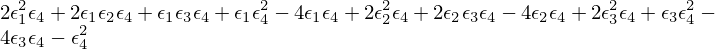

factorized


working with


original


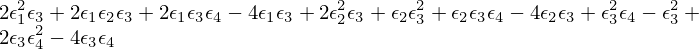

factorized


working with


original


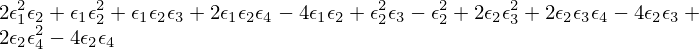

factorized


working with


original


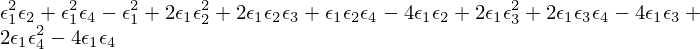

factorized


working with


original


factorized


working with


original


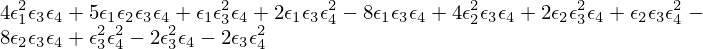

factorized


working with


original


factorized


working with


original


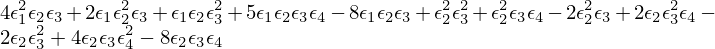

factorized


working with


original


factorized


working with


original


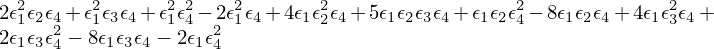

factorized


working with


original


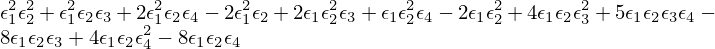

factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


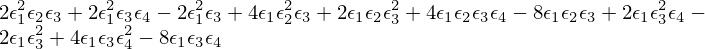

factorized


working with


original


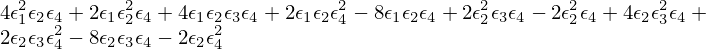

factorized


working with


original


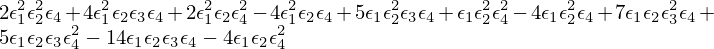

factorized


working with


original


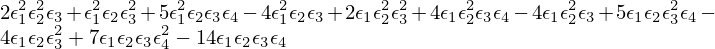

factorized


working with


original


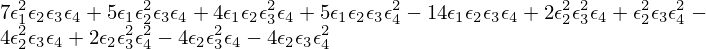

factorized


working with


original


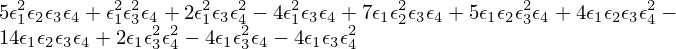

factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


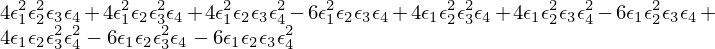

factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


degree  1
154
original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


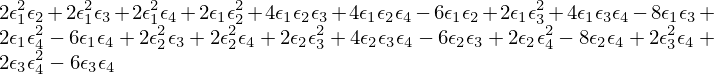

factorized


working with


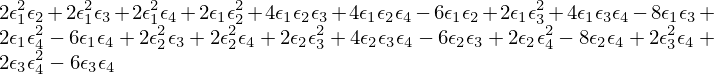

original


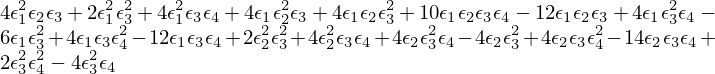

factorized


working with


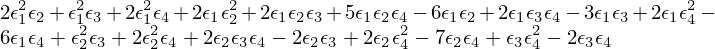

original


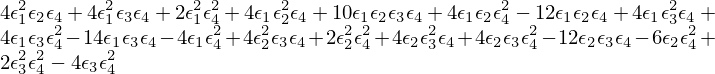

factorized


working with


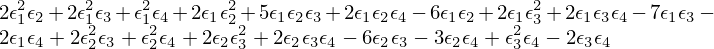

original


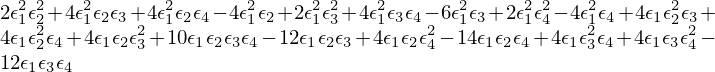

factorized


working with


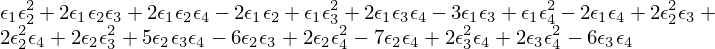

original


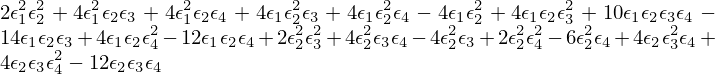

factorized


working with


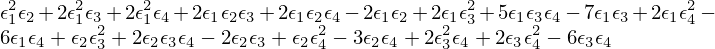

original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


factorized


working with


original


KeyboardInterrupt: 

In [18]:
for i in range(len(all_terms)):
    print("degree ",i)
    coeffi=all_terms[i]
    #print(coeffi)
    base=[] #list of common factors that do not contain epsilons
    #find the unique common factors without epsilons
    for j in range(len(coeffi)):
        b=coeffi[j][1]
        present=False
        for k in range(len(base)):
            if np.all(base[k]==b):
                present=True
        if not present:
            base.append(b)
    #find which term in the original coefficient expression correspond to each common factor
    common_bases_idx=[[] for i in range(len(base))] #which terms have those common factors
    for j in range(len(coeffi)):
        b=coeffi[j][1]
        for k in range(len(base)):
            if np.all(base[k]==b):
                common_bases_idx[k].append(j)
    #now for each base, print the epsilon terms side by side to check which sign wins 
    print(len(base))
    for k in range(len(base)):
        #print(base[k])
        idxs=common_bases_idx[k]
        epsilons_terms=0
        for idx in idxs:
            terms=coeffi[idx]
            #print("idx",terms)
            number=terms[0]
            epsilons=terms[2]
            prod=1
            for e in epsilons:
                prod*=e

            #if np.abs(number)==1:
            epsilons_terms+=number*prod
        nargs=len(sympy.Add.make_args(epsilons_terms))
        if nargs>2:
            factorized=sympy.factor_list(epsilons_terms)[1]
            if len(factorized)==1:
                expr=epsilons_terms
            else:
                expr=factorized[-1][0]
            elements=[]
            print("original")
            display(epsilons_terms)
            print("factorized")
            display(factorized)
            print("working with")
            display(expr)
            for term_ in sympy.Mul.make_args(expr):
                if type(term_)==sympy.Integer:
                    if term_<0:
                        print(term_)
            
            
            

In [ ]:
2*epsilon4^2*epsilon1 
+ epsilon4*epsilon1^2 
+ 1*epsilon4*epsilon1*epsilon3 
- 4*epsilon4*epsilon1 

+ 2*epsilon1*epsilon3^2
+ 1*epsilon1*epsilon3*epsilon2
+ 1*epsilon1*epsilon3*epsilon4
- 4*epsilon1*epsilon3

+ 2*epsilon1*epsilon2^2
+ epsilon1*epsilon2*epsilon4*
+ 1*epsilon1*epsilon2*epsilon3 
- 4*epsilon1*epsilon2

+ epsilon1^2*epsilon2 
- epsilon1^2 

















In [7]:
expr="2*epsilon4^2*epsilon1^2*epsilon2 + epsilon4^2*epsilon1*epsilon2^2 + 5*epsilon4^2*epsilon1*epsilon2*epsilon3 - 4*epsilon4^2*epsilon1*epsilon2 + 2*epsilon4*epsilon1^2*epsilon2^2 + 4*epsilon4*epsilon1^2*epsilon2*epsilon3 - 4*epsilon4*epsilon1^2*epsilon2 + 5*epsilon4*epsilon1*epsilon2^2*epsilon3 - 4*epsilon4*epsilon1*epsilon2^2 + 7*epsilon4*epsilon1*epsilon2*epsilon3^2 - 14*epsilon4*epsilon1*epsilon2*epsilon3"
print(expr.replace("^","**"))

2*epsilon4**2*epsilon1**2*epsilon2 + epsilon4**2*epsilon1*epsilon2**2 + 5*epsilon4**2*epsilon1*epsilon2*epsilon3 - 4*epsilon4**2*epsilon1*epsilon2 + 2*epsilon4*epsilon1**2*epsilon2**2 + 4*epsilon4*epsilon1**2*epsilon2*epsilon3 - 4*epsilon4*epsilon1**2*epsilon2 + 5*epsilon4*epsilon1*epsilon2**2*epsilon3 - 4*epsilon4*epsilon1*epsilon2**2 + 7*epsilon4*epsilon1*epsilon2*epsilon3**2 - 14*epsilon4*epsilon1*epsilon2*epsilon3


In [ ]:
2*epsilon4^2*epsilon1^2*epsilon2 
+ epsilon4^2*epsilon1*epsilon2^2 
+ 2*epsilon4*epsilon1^2*epsilon2^2 

+ 5*epsilon4^2*epsilon1*epsilon2*epsilon3 
- 4*epsilon4^2*epsilon1*epsilon2 


+ 4*epsilon4*epsilon1^2*epsilon2*epsilon3 
- 4*epsilon4*epsilon1^2*epsilon2 

+ 5*epsilon4*epsilon1*epsilon2^2*epsilon3 
- 4*epsilon4*epsilon1*epsilon2^2 

+ 7*epsilon4*epsilon1*epsilon2*epsilon3^2 

- 14*epsilon4*epsilon1*epsilon2*epsilon3

In [26]:
epsilon1,epsilon2,epsilon3,epsilon4=sympy.symbols("epsilon1,epsilon2,epsilon3,epsilon4",positive=True)


In [27]:
expr=2*epsilon4**2*epsilon1**2*epsilon2 + epsilon4**2*epsilon1*epsilon2**2 + 5*epsilon4**2*epsilon1*epsilon2*epsilon3 - 4*epsilon4**2*epsilon1*epsilon2 + 2*epsilon4*epsilon1**2*epsilon2**2 + 4*epsilon4*epsilon1**2*epsilon2*epsilon3 - 4*epsilon4*epsilon1**2*epsilon2 + 5*epsilon4*epsilon1*epsilon2**2*epsilon3 - 4*epsilon4*epsilon1*epsilon2**2 + 7*epsilon4*epsilon1*epsilon2*epsilon3**2 - 14*epsilon4*epsilon1*epsilon2*epsilon3


In [28]:
sympy.simplify(expr)

In [29]:
sympy.simplify(expr/(epsilon1*epsilon2*epsilon4))

In [30]:
for term in sympy.Add.make_args(sympy.simplify(expr/(epsilon1*epsilon2*epsilon4))):
    if term<0:
        display(term)

In [31]:
for term in sympy.Add.make_args(sympy.simplify(expr/(epsilon1*epsilon2*epsilon4))):
    if term>0:
        display(term)

In [32]:
expr2="3*epsilon4^2*epsilon1*epsilon2*epsilon3^2 + epsilon4^2*epsilon2^2*epsilon3^2 - 2*epsilon4^2*epsilon2*epsilon3^2 + 3*epsilon4*epsilon1^2*epsilon2*epsilon3^2 + 3*epsilon4*epsilon1*epsilon2^2*epsilon3^2 - 6*epsilon4*epsilon1*epsilon2*epsilon3^2 - 2*epsilon4*epsilon2^2*epsilon3^2"
expr2.replace("^","**")

'3*epsilon4**2*epsilon1*epsilon2*epsilon3**2 + epsilon4**2*epsilon2**2*epsilon3**2 - 2*epsilon4**2*epsilon2*epsilon3**2 + 3*epsilon4*epsilon1**2*epsilon2*epsilon3**2 + 3*epsilon4*epsilon1*epsilon2**2*epsilon3**2 - 6*epsilon4*epsilon1*epsilon2*epsilon3**2 - 2*epsilon4*epsilon2**2*epsilon3**2'

In [33]:
expr=3*epsilon4**2*epsilon1*epsilon2*epsilon3**2 + epsilon4**2*epsilon2**2*epsilon3**2 - 2*epsilon4**2*epsilon2*epsilon3**2 + 3*epsilon4*epsilon1**2*epsilon2*epsilon3**2 + 3*epsilon4*epsilon1*epsilon2**2*epsilon3**2 - 6*epsilon4*epsilon1*epsilon2*epsilon3**2 - 2*epsilon4*epsilon2**2*epsilon3**2


In [34]:
sympy.simplify(expr)

In [35]:
for term in sympy.Add.make_args(sympy.simplify(expr/(epsilon2*epsilon4*epsilon3**2))):
    if term<0:
        display(term)

In [36]:
for term in sympy.Add.make_args(sympy.simplify(expr/(epsilon2*epsilon4*epsilon3**2))):
    if term>0:
        display(term)